

# Projeto 2 - Ciência dos Dados

Nome: Amanda Rosa do Carmo

Nome: Beatriz Cabral

Nome: Sophia Kerber Shigueoka

Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
# Classificador automático de sentimento


## 1. Introdução

O objetivo desse projeto é criar um classificador capaz de analisar como a audiência de “13 reasons why”, uma série de televisão polêmica, está reagindo. Para tal fim, será feita uma análise da probabilidade de um tweet ser relevante dada as palavras do seu conteúdo, utilizando o princípio do algoritimo de Naive Bayes.

## 2. Desenvolvimento e metodologia

   A fim de simplificar a explicação do processo de desenvolvimento do projeto, ele será dividido em  X etapas.

### ETAPA 1 - Preparando o ambiente no jupyter

Nessa etapa, serão baixadas e importadas todas as bibliotecas relevantes para o código, bem como implementadas todas as funções a serem utilizadas

In [2]:
%%capture

#Instalando o tweepy
!pip install tweepy

In [3]:
#Importando as bibliotecas
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle

In [4]:
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    punctuation = '[!\-.:?;•,]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

___
### ETAPA 2 - Autenticando no  Twitter

* Conta: ***@KerberSophie***

Aqui será feita a autenticação no twitter, a partir de um código obtido no próprio site.

In [5]:
#Dados de autenticação do twitter:

#Coloque aqui o identificador da conta no twitter: @KerberSophie

#leitura do arquivo no formato JSON
with open('auth.pass') as fp:    
    data = json.load(fp)

#Configurando a biblioteca. Não modificar
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

### ETAPA 3 - Escolha de um produto e coleta das mensagens


Primeiramente, iremos fazer a coleta dos dados, nesse caso de tweets, a partir da keyword “13 reasons why” escolhida. Feita a coleta, os dados foram salvos dentro de uma planilha no excel. Para importar as mensagens do Twitter, foi necessário o uso da biblioteca Tweepy.

Quantidade mínima de mensagens capturadas:
Escolhemos 1480 a partir de um método empírico. Quando testamos com 1000 não conseguimos tweets suficientes, e chegamos
a conclusão de que o problema era proveniente do set(), que diminuía a quantidade de tweets baixados. Assim, decidiu-se
aumentar a quantidade de tweets para 1500, já que com 1000 ficaram falatando 360 tweets. Com 1500, ficamos com 20 tweets a mais.
como eram somente 20 tweets, imaginamos que poucos deles seriam retweets, então tiramos exatamente 20 tweets dos 1500.
Com 1480 tweets, conseguimos 399 tweets de teste, ou seja, faltou somente 1. não achamos que 1 tweets afetará tanto a base
de dados, então decidimos manter os 1480.

In [6]:
#Produto escolhido:
produto = '13 Reasons Why'

n = 1480
#Quantidade mínima de mensagens para a base de treinamento:
t = 600

#Filtro de língua, escolha uma na tabela ISO 639-1.
lang = 'pt'

Capturando os dados do twitter:

In [7]:
# #Cria um objeto para a captura
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# #Inicia a captura, para mais detalhes: ver a documentação do tweepy
# i = 1
# msgs = []
# for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items():    
#     msgs.append(msg.text.lower())
#     i += 1
#     if i > n:
#         break

# #Embaralhando as mensagens para reduzir um possível viés
# list = []
# shuffle(msgs)

# #Usando o set() para tirar os retweets
# listaset = set(msgs)

# #Adicionando o resultado do set() a uma lista para evitar o erro TypeError: 'set' object is not subscriptable
# for value in listaset:
#     list.append(value)

Salvando os dados em uma planilha Excel:

In [8]:
# #Linhas abaixo foram comentadas uma vez que o conjunto de dados era o mesmo, mas o número de tweets foi alterado.

# # #Verifica se o arquivo não existe para não substituir um conjunto pronto
# # if not os.path.isfile('./{0}.xlsx'.format(produto)):
    
#     #Abre o arquivo para escrita
# writer = pd.ExcelWriter('{0} novo.xlsx'.format(produto))

#     #divide o conjunto de mensagens em duas planilhas
# dft = pd.DataFrame({'Treinamento' : pd.Series(list[:t])})
# dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

# dfc = pd.DataFrame({'Teste' : pd.Series(list[t:])})
# dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

#     #fecha o arquivo
# writer.save()

### ETAPA 4 - Classificação manual dos tweets 

Previamente, foram estabelecidas 4 categorias para a classificação das mensagens, entre elas,

* 	***P*** - Positivo – se a mensagem transmitida for positiva;
*	***O*** - Irrelevante – se a mensagem transmitida não for relevante para análise e/ou não se encaixar em nenhuma das outras categorias;
*	***N*** - Negativo – se a mensagem transmitida for negativa;
*	***R*** - Reação – se a mensagem transmitida for uma reação sobre algum episódio, temporada, ou da série em geral.


Estabelecidas as categorias e selecionados os tweets, será criada uma base de treinamento, na qual as mensagens serão qualificadas manualmente no excel de acordo com as categoria mais propícias. 

___
### ETAPA 5 - Montando o Classificador Naive-Bayes

### Naive Bayes
O algoritmo de Naive Bayes é um classificador probabilístico baseado no teorema de Bayes, utilizado no processo de machine learning. O algoritmo supõe que uma característica independe da outra para acontecer, ou seja, mesmo na presença de uma característica particular em uma classe, isso não afeta na probabilidade de qualquer característica ocorrer. O teorema de bayes é escrito da seguinte forma:

*** colocar a formula de bayes ***


Esse método será utilizado no projeto, uma vez que permite calcular a probabilidade de uma mensagem ser positiva, por exemplo, dada as palavras utilizadas, assumindo que as palavras em um tweet não tem nenhuma relação entre elas.

A partir do nosso modelo, poderíamos reescrever o teorema de bayes da seguinte forma:

*** colocar a formula de bayes nosso modelo ***

A variável C é a classe variável que representa se um tweet será positivo, negativo, irrelevante ou uma reação, a partir das condições estabelecidas (probabilidade de ocorrência de uma palavra dada as condições). A variável P representa as palavras ocorridas nos tweets. P pode ser:

*** colocar os possiveis valores de P ***

Substituindo P por cada uma das possíveis palavras, temos:

*** colocar a formula de bayes nosso modelo  com valores de P***

Para implementar esse algoritmo, uma nova tabela deve ser criada com as palavras e suas respectivas frequências relativas em cada uma das categorias. Porém antes disso, deverá ser feita uma limpeza das mensagens, removendo pontuações e caracteres que não convém a análise.  

In [9]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle


In [10]:
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    punctuation = '[!\-.:?;•,]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

In [11]:
excel = pd.read_excel('13 Reasons Why v2.xlsx', sheet_name='Treinamento')
excel.head()

,Treinamento,Categoria
0,alguém aq ja assistiu a 3° temp de 13 reasons ...,O
1,(na 3° temporada de 13 reasons why) eu estou t...,R
2,13 ep de 13 reasons why p tentar fazer vc sent...,N
3,nossa nem sabia que tinha lançado a 3° tempora...,O
4,estava começando a ver o primeiro episódio de...,N


In [12]:
excel_treino = pd.read_excel('13 Reasons Why v2.xlsx', sheet_name='Teste')
excel_treino.rename(columns={'Unnamed: 1':'Clas_manual'}, inplace=True) 
excel_treino.head()

,Teste,Clas_manual
0,a coisa mais idiota de 13 reasons why foi colo...,N
1,atribuí nota 8 ao episódio 3x1 - yeah. i'm the...,O
2,rt @citou13reasons: ''quando você julga uma pe...,O
3,"terminei 13 reasons why também, meu hobbie é c...",R
4,rt @wivisampaio: saiu a nova temporada de elit...,O


In [13]:
# Função para limpar e criar tabela de frequências relativas

def FreqRel(cat):
    texto_completo = ' '.join(excel[excel.Categoria==cat].Treinamento)
    semhttp = re.sub(r'http\S+', '', texto_completo)
    text_limpo = cleanup(semhttp)
    rel = text_limpo.split()
    freq_rel = pd.Series(rel).value_counts(True)
    return freq_rel

def FreqAbs(cat):
    texto_completo = ' '.join(excel[excel.Categoria==cat].Treinamento)
    semhttp = re.sub(r'http\S+', '', texto_completo)
    text_limpo = cleanup(semhttp)
    rel = text_limpo.split()
    freq_abs = pd.Series(rel).value_counts()
    return freq_abs

FreqAbs('P')

reasons           72
13                68
why               68
de                62
a                 38
temporada         29
que               20
o                 14
eu                13
é                 13
foi               12
e                 11
da                10
série             10
essa               9
mas                9
tá                 9
q                  9
uma                9
boa                8
terceira           8
muito              8
não                8
#bancodeseries     7
nota               7
foda               7
ao                 7
episódio           7
atribuí            7
me                 6
                  ..
socorrooooo        1
única              1
vez                1
aborto             1
nobody's           1
mudança            1
abriu              1
acontecido         1
primitivos         1
realidade          1
melhorando         1
ótima              1
why'               1
isso               1
3x6                1
why''              1
saco         

In [14]:
# Estas funções dividem a função anterior
def Limpa(texto):
    semhttp = re.sub(r'http\S+', '', texto)
    text_limpo = cleanup(semhttp)
    rel = text_limpo.split()
    return(rel)

# def FreqRel(Limpa):
#     print(Limpa(texto_completo))
#     freq_rel = pd.Series(Limpa).value_counts(True)
#     return freq_rel


___
### Descobrindo P(N), P(R), P(P) e P(0)

In [15]:
texto_1 = ' '.join(excel[excel.Categoria=='O'].Treinamento)
texto_2 = ' '.join(excel[excel.Categoria=='R'].Treinamento)
texto_3 = ' '.join(excel[excel.Categoria=='P'].Treinamento)
texto_4 = ' '.join(excel[excel.Categoria=='N'].Treinamento)

texto_1 = Limpa(texto_1)
texto_2 = Limpa(texto_2)
texto_3 = Limpa(texto_3)
texto_4 = Limpa(texto_4)

#juntando todos os textos
texto_enorme = texto_1 + texto_2 + texto_3 + texto_4
set(texto_enorme)
dic_global = 0
for palavra in texto_enorme:
        dic_global+=1
    
print('Todas as palavras somadas:')
print(dic_global)

def prob_cat(cat):
    palavras = 0
    texto_completo = ' '.join(excel[excel.Categoria==cat].Treinamento)
    texto_completo.replace('•', '')
    semhttp = re.sub(r'http\S+', '', texto_completo)
    text_limpo = cleanup(semhttp)
    rel = text_limpo.split()
    set(rel)
    # Para verificar se o código era coerente, imprimimos o total de palavras de cada categoria
    for palavra in rel:
        palavras += 1
    prob_final = palavras/dic_global
    return prob_final

Todas as palavras somadas:
10095


In [16]:
print("Probabilidade da Categoria 'Neutro'")
print(prob_cat('O'))
print('')
print("Probabilidade da Categoria 'Negativo'")
print(prob_cat('N'))
print('')
print("Probabilidade da Categoria 'Positivo'")
print(prob_cat('P'))
print('')
print("Probabilidade da Categoria 'Reação'")
print(prob_cat('R'))



print('')
print("Probabilidade Total (se tudo der certo, deve ser 1)")
print(prob_cat('O') + prob_cat('N') + prob_cat('P') + prob_cat('R'))

Probabilidade da Categoria 'Neutro'
0.5090638930163447

Probabilidade da Categoria 'Negativo'
0.2220901436354631

Probabilidade da Categoria 'Positivo'
0.11362060425953442

Probabilidade da Categoria 'Reação'
0.15522535908865776

Probabilidade Total (se tudo der certo, deve ser 1)
1.0


In [17]:
try:
    Fqr = FreqAbs('R')
    Fqn = FreqAbs('N')
    Fqp = FreqAbs('P')
    Fqo = FreqAbs('O')
except: 
    pass

FreqAbs('O')

reasons       268
13            264
why           255
de            243
a             154
e             131
temporada      95
elite          78
que            70
eu             61
o              51
não            50
assistir       49
rt             42
pra            34
3              34
sobre          34
2              32
é              31
do             30
da             30
ver            29
1              29
terceira       28
vou            27
séries         27
q              26
to             24
se             23
com            23
             ... 
hannah          1
aaaaaaaa        1
riverdale…      1
complicado      1
nossos          1
39              1
"el             1
47              1
@anabiaor       1
23hs            1
+…              1
vó              1
roteiro         1
chocada         1
15ª             1
próxim…         1
pouco           1
assasino        1
aiiii🥵😻         1
[podcast        1
milhares        1
acontecem       1
tempinho        1
bailey…         1
daqui     

In [18]:
Neutro_set = set(FreqRel(0).index)
Reacao_set = set(FreqRel('R').index)

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

###   P(N | palavras) = P(N) * P(cada_palavra | N)

NÃO É PRECISO DIVIDIR PELA PROBABILIDADE 

In [19]:
import numpy as np
pR = np.sum(Fqr)
pN = np.sum(Fqn)
pP = np.sum(Fqp)
pO = np.sum(Fqo)

alpha = 1
V = 1e6

In [20]:
pR

1567

In [21]:
# Isso tá certo, talkey?

prob_R = 1
prob_tweet = 1
dicR = {}
for tweet in excel_treino['Teste']:
    tweet = cleanup(tweet)
    pal_tweet = tweet.split()
    for palavra_teste in pal_tweet:
        # Calcula prob da palavra com smoothing.
        c = 0
        if palavra_teste in Fqr:
            c = Fqr[palavra_teste]
        p = np.log((c + alpha)/(pR + alpha*V))
        prob_tweet = prob_tweet + p
    prob_tweet = prob_tweet + np.log(prob_cat('R'))
    dicR[tweet] = prob_tweet

In [22]:
prob_N = 1
prob_tweet = 1
dicN = {}
for tweet in excel_treino['Teste']:
    tweet = cleanup(tweet)
    pal_tweet = tweet.split()
    probabilidade = 1
    for palavra_teste in pal_tweet:
        c = 0
        if palavra_teste in Fqn:
            c = Fqn[palavra_teste]
        p = np.log((c + alpha)/(pR + alpha*V))
        prob_tweet = prob_tweet + p
    prob_tweet = prob_tweet + np.log(prob_cat('N'))
    dicN[tweet] = prob_tweet

In [23]:
prob_P = 1
prob_tweet = 1
dicP = {}
for tweet in excel_treino['Teste']:
    tweet = cleanup(tweet)
    pal_tweet = tweet.split()
    for palavra_teste in pal_tweet:
        c = 0
        if palavra_teste in Fqp:
            c = Fqp[palavra_teste]
        p = np.log((c + alpha)/(pP + alpha*V))
        prob_tweet = prob_tweet + p
    prob_tweet = prob_tweet + np.log(prob_cat('P'))
    dicP[tweet] = prob_tweet

In [24]:
prob_O = 1
prob_tweet = 1
dicO = {}
for tweet in excel_treino['Teste']:
    tweet = cleanup(tweet)
    pal_tweet = tweet.split()
    for palavra_teste in pal_tweet:
        c = 0
        if palavra_teste in Fqo:
            c = Fqo[palavra_teste]
        p = np.log((c + alpha)/(pO + alpha*V))
        prob_tweet = prob_tweet + p
    prob_tweet = prob_tweet + np.log(prob_cat('O'))
    dicO[tweet] = prob_tweet

In [25]:
print(dicN['a coisa mais idiota de 13 reasons why foi colocar o zac e a cheryl nas fitas  botaram eles num nível de fdp igual aos outros desnecessário'])

-323.83521133919317


In [26]:
print(dicO['a coisa mais idiota de 13 reasons why foi colocar o zac e a cheryl nas fitas  botaram eles num nível de fdp igual aos outros desnecessário'])

-316.05721622945106


In [27]:
print(dicR['a coisa mais idiota de 13 reasons why foi colocar o zac e a cheryl nas fitas  botaram eles num nível de fdp igual aos outros desnecessário'])

-330.2805283170738


In [28]:
print(dicP['a coisa mais idiota de 13 reasons why foi colocar o zac e a cheryl nas fitas  botaram eles num nível de fdp igual aos outros desnecessário'])

-333.5303071362959


In [29]:
tweets_classificados = []
tweet = 0

for tweet in excel_treino['Teste']:
    tweet = cleanup(tweet)
    pal_tweet = tweet.split()
    maior = dicN[tweet]
    if maior < dicP[tweet]:
        maior = dicP[tweet]
    elif maior < dicO[tweet]:
        maior = dicO[tweet]
    elif maior < dicR[tweet]:
        maior = dicR[tweet]
        
    if maior == dicR[tweet]:    
        tweets_classificados.append('R')
    elif maior == dicN[tweet]:    
        tweets_classificados.append('N')
    elif maior == dicP[tweet]:    
        tweets_classificados.append('P')
    elif maior == dicO[tweet]:
        tweets_classificados.append('O')

excel_treino["Previsto"] = tweets_classificados

In [30]:
excel_treino.head()

,Teste,Clas_manual,Previsto
0,a coisa mais idiota de 13 reasons why foi colo...,N,O
1,atribuí nota 8 ao episódio 3x1 - yeah. i'm the...,O,O
2,rt @citou13reasons: ''quando você julga uma pe...,O,O
3,"terminei 13 reasons why também, meu hobbie é c...",R,O
4,rt @wivisampaio: saiu a nova temporada de elit...,O,O


___
### Acurácia:

A acurácia serve para medir o grau de exatidão do classificador. Para realizar esse teste de qualidade foram comparados a categorização manual com a feita pelo código elaborado. 

In [31]:
P = 0
falso_P = 0
O = 0
falso_O = 0
R = 0
falso_R = 0
N = 0
falso_N = 0


total = len(excel_treino["Teste"])
i = 0
while i < len(excel_treino['Clas_manual']):
    if excel_treino['Clas_manual'][i] == 'N':
        if excel_treino['Previsto'][i] == 'N':
            N += 1
        else:
            falso_N += 1
        
    if excel_treino['Clas_manual'][i] == 'P':
        if excel_treino['Previsto'][i] == 'P':
            P += 1
        else:
            falso_P += 1
            
    if excel_treino['Clas_manual'][i] == 'O':
        if excel_treino['Previsto'][i] == 'O':
            O += 1
        else:
            falso_O += 1
    
    if excel_treino['Clas_manual'][i] == 'R':
        if excel_treino['Previsto'][i] == 'R':
            R += 1
        else:
            falso_R += 1
    i += 1


In [32]:
print("Positivos Verdadeiros: ", round((P/total)*100,2), "%")
print("Positivos Falsos: ", round((falso_P/total)*100, 2), "%")
print("Negativos Verdadeiros: ", round((N/total)*100,2), "%")
print("Negativos Falsos: ", round((falso_N/total)*100, 2), "%")
print("Neutros Verdadeiros: ", round((O/total)*100,2), "%")
print("Neutros Falsos: ", round((falso_O/total)*100, 2), "%")
print("Reações Verdadeiros: ", round((R/total)*100,2), "%")
print("Reações Falsos: ", round((falso_R/total)*100, 2), "%")
print("_"*35)

print("Acertos: ", round(((P/total)+(N/total)+(O/total)+(R/total))*100,2), "%")
print("Erros: ", round(((falso_P/total)+(falso_N/total)+(falso_R/total)+(falso_O/total))*100,2), "%")

Positivos Verdadeiros:  0.0 %
Positivos Falsos:  10.55 %
Negativos Verdadeiros:  0.0 %
Negativos Falsos:  18.84 %
Neutros Verdadeiros:  52.51 %
Neutros Falsos:  0.0 %
Reações Verdadeiros:  0.0 %
Reações Falsos:  18.09 %
___________________________________
Acertos:  52.51 %
Erros:  47.49 %


Aqui é possível observar que a acurácia do nosso classificador é de 52,51%

### **DASHBOARD**

In [50]:
from time import sleep

n = 400

while True:
    #Cria um objeto para a captura
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    #Inicia a captura, para mais detalhes: ver a documentação do tweepy
    i = 1
    msgs = []
    for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items(): 
        if msg not in msgs:
            msgs.append(msg.text.lower())
            i += 1
        if i > n:
            break
    #Embaralhando as mensagens para reduzir um possível viés
    lista = []
    shuffle(msgs)

    #Usando o set() para tirar os retweets
    listaset = set(msgs)

    #Adicionando o resultado do set() a uma lista para evitar o erro TypeError: 'set' object is not subscriptable
    for value in listaset:
        lista.append(value)
    
    #criando dataframe com novos tweets
    df_teste = pd.DataFrame({'Teste' : pd.Series(lista)})
    
    #classifie new tweets
    tweets_classificados = []

    for tweet in df_teste['Teste']:        
        tweet = cleanup(tweet)
        pal_tweet = tweet.split()
        
        prob_tweet = 0
        
        for palavra_teste in pal_tweet:
            # Calcula prob da palavra com smoothing.
            c = 0
            if palavra_teste in Fqp:
                c = Fqp[palavra_teste]
            p = np.log((c + alpha)/(pP + alpha*V))
            prob_tweet = prob_tweet + p
        prob_tweet = prob_tweet + np.log(prob_cat('P'))
        dicP[tweet] = prob_tweet
        print(dicP[tweet], 'prob P')
        
        prob_tweet = 0
        
        for palavra_teste in pal_tweet:
            # Calcula prob da palavra com smoothing.
            c = 0
            if palavra_teste in Fqo:
                c = Fqo[palavra_teste]
            p = np.log((c + alpha)/(pO + alpha*V))
            prob_tweet = prob_tweet + p
        prob_tweet = prob_tweet + np.log(prob_cat('O'))
        dicO[tweet] = prob_tweet
        print(dicO[tweet], 'prob O')
        
        prob_tweet = 0
        
        for palavra_teste in pal_tweet:
            # Calcula prob da palavra com smoothing.
            c = 0
            if palavra_teste in Fqr:
                c = Fqr[palavra_teste]
            p = np.log((c + alpha)/(pR + alpha*V))
            prob_tweet = prob_tweet + p
        prob_tweet = prob_tweet + np.log(prob_cat('R'))
        dicR[tweet] = prob_tweet
        print(dicR[tweet], 'prob R')
        
        prob_tweet = 0
        
        for palavra_teste in pal_tweet:
            # Calcula prob da palavra com smoothing.
            c = 0
            if palavra_teste in Fqn:
                c = Fqn[palavra_teste]
            p = np.log((c + alpha)/(pN + alpha*V))
            prob_tweet = prob_tweet + p
        prob_tweet = prob_tweet + np.log(prob_cat('N'))
        dicN[tweet] = prob_tweet
        print(dicN[tweet], 'prob N')
        
        print("")

        
        previsao = max(dicN[tweet],dicP[tweet],dicO[tweet],dicR[tweet])
        if previsao == dicN[tweet]:
            tweets_classificados.append('N')
        if previsao == dicP[tweet]:
            tweets_classificados.append('P')
        if previsao == dicO[tweet]:
            tweets_classificados.append('O')
        if previsao == dicR[tweet]:
            tweets_classificados.append('R')                   
            
    df_teste['Categorias'] = tweets_classificados 
        
    sleep(604800)


-213.19970510499135 prob P
-195.7436133550126 prob O
-212.38571989290418 prob R
-207.96854057315468 prob N

-307.55525325653076 prob P
-283.49912614220284 prob O
-305.93321239009805 prob R
-295.6890441737076 prob N

-185.01634496674743 prob P
-168.58539027162874 prob O
-180.25700734944382 prob R
-179.02035793251304 prob N

-201.30311852059745 prob P
-183.28331153091727 prob O
-199.33474610787604 prob R
-193.38241752183367 prob N

-224.63681587152348 prob P
-203.10025531375283 prob O
-223.4144591451971 prob R
-220.82582867139988 prob N

-314.7244144396125 prob P
-285.1186868470459 prob O
-313.8387763864039 prob R
-307.34661955911776 prob N

-319.2863951544786 prob P
-295.84527162746343 prob O
-309.081779002989 prob R
-305.46339068192054 prob N

-253.03056299861075 prob P
-226.8954404549704 prob O
-246.02457487113844 prob R
-237.28926119863644 prob N

-147.08398199826695 prob P
-134.79825691295474 prob O
-142.5565473220212 prob R
-139.83814672815188 prob N

-227.8793027780917 prob P
-207

-144.61334424788504 prob O
-156.51957756614513 prob R
-152.16869625015602 prob N

-287.76685704054745 prob P
-271.4161463792155 prob O
-283.12007416191693 prob R
-280.1827920197682 prob N

-268.58237812339854 prob P
-249.55778833585316 prob O
-266.79289759882437 prob R
-259.86621228423127 prob N

-194.88190217324842 prob P
-181.79848587717703 prob O
-193.34216136939625 prob R
-190.60151830436826 prob N

-111.97437060000769 prob P
-99.81612931794528 prob O
-108.17656513978919 prob R
-106.9754729940589 prob N

-311.39210448451996 prob P
-281.08117216903383 prob O
-305.7196382898 prob R
-302.73768691140225 prob N

-106.3271584768399 prob P
-96.48801479302162 prob O
-106.59837977085918 prob R
-104.49414416561878 prob N

-158.00207037382896 prob P
-143.17178720809014 prob O
-152.49550219976962 prob R
-150.4357772809509 prob N

-279.17222192315774 prob P
-256.43824443732524 prob O
-270.63208146709775 prob R
-270.82898586806476 prob N

-231.5457174932037 prob P
-211.62970170325642 prob O
-223

-206.6692440571507 prob P
-189.90078200818516 prob O
-201.19482598040034 prob R
-199.55278013728406 prob N

-117.73586976885035 prob P
-108.28269833466206 prob O
-115.76149575220255 prob R
-113.3057132703044 prob N

-351.4003087205673 prob P
-323.3719259354918 prob O
-353.6755117202702 prob R
-353.8155090570723 prob N

-131.77433386007652 prob P
-122.78759196075835 prob O
-126.70993766336541 prob R
-128.71259576194103 prob N

-251.50650923563086 prob P
-221.52674323652158 prob O
-244.67724413139916 prob R
-241.92527173492005 prob N

-92.9159666842857 prob P
-80.28589405959836 prob O
-89.09242398524442 prob R
-86.53787833665106 prob N

-126.66972474692635 prob P
-110.65031327046523 prob O
-123.96389842221426 prob R
-120.55860084417888 prob N

-283.48078350667697 prob P
-261.5944834527598 prob O
-281.2193062372902 prob R
-280.10416205036233 prob N

-302.35636167012075 prob P
-283.4874473983746 prob O
-297.3018139843732 prob R
-293.9174874117971 prob N

-154.5229535906628 prob P
-144.7406

-330.76217652313835 prob N

-274.4008489028778 prob P
-253.13689730721646 prob O
-270.5191385212841 prob R
-269.46019404837597 prob N

-218.63738315476633 prob P
-206.52942295215058 prob O
-213.32352681835005 prob R
-212.8235238911594 prob N

-163.63913012553274 prob P
-149.57151597244555 prob O
-162.92447539101047 prob R
-156.6968413929599 prob N

-173.71128746411043 prob P
-153.3561997016276 prob O
-168.5445033678039 prob R
-164.75862427396845 prob N

-154.13313951145562 prob P
-139.57402591291847 prob O
-151.62985520071416 prob R
-147.4881023023507 prob N

-284.5040619817444 prob P
-256.4564163495862 prob O
-280.7411109482346 prob R
-266.82004328461517 prob N

-298.3874416053592 prob P
-281.97738626541866 prob O
-296.3128059165423 prob R
-292.97172181077303 prob N

-327.2137643215429 prob P
-305.5387830220913 prob O
-320.2345603226423 prob R
-313.17411165232454 prob N

-109.75879688400326 prob P
-97.57238472497417 prob O
-105.90523259029924 prob R
-102.20599975677953 prob N

-151.92

-160.6129568264775 prob P
-145.80489453221242 prob O
-157.61818985481327 prob R
-157.58034230201108 prob N

-325.37653711580816 prob P
-291.54838189657823 prob O
-316.2864962116718 prob R
-310.8363074053212 prob N

-323.249938745726 prob P
-291.1325106793898 prob O
-312.3721543589678 prob R
-307.05399981792567 prob N

-276.6593966836854 prob P
-252.45425733699977 prob O
-270.9752785055069 prob R
-263.70072225293166 prob N

-138.90014848332032 prob P
-119.63175025104249 prob O
-133.10619559717793 prob R
-127.2429625405916 prob N

-214.4069064182197 prob P
-193.34245214313648 prob O
-218.62981235454728 prob R
-212.96536306966996 prob N

-174.5816411007976 prob P
-152.0951949282371 prob O
-169.49923080651914 prob R
-166.68206156717167 prob N

-146.35446717353614 prob P
-136.394707629862 prob O
-144.0537042759529 prob R
-141.2776856037906 prob N

-159.0035189140434 prob P
-139.57989917837995 prob O
-150.93072505816292 prob R
-150.1741605324382 prob N

-293.86642972737826 prob P
-274.376901

-277.2098175519667 prob O
-303.974494128202 prob R
-300.698755981557 prob N

-209.55164764539768 prob P
-192.9462793355944 prob O
-209.25418607819114 prob R
-206.12151842525154 prob N

-252.07813322012072 prob P
-221.8460689639202 prob O
-246.2664270259174 prob R
-241.34199895042 prob N

-241.10107863143566 prob P
-221.92826980485103 prob O
-233.23393823795112 prob R
-233.74699467221055 prob N

-250.47059001630117 prob P
-230.69955991867332 prob O
-243.40819502694984 prob R
-241.55802783963208 prob N

-96.95374089501942 prob P
-86.96057381561958 prob O
-90.4505474693976 prob R
-92.30027271377519 prob N

-138.91453722077244 prob P
-128.2178429309778 prob O
-133.00038875256826 prob R
-133.142440631567 prob N

-117.59403957341114 prob P
-107.77643181780667 prob O
-114.51830223472332 prob R
-109.06834787276253 prob N

-119.41430055277141 prob P
-107.8536734032005 prob O
-116.69148532843484 prob R
-110.50137584975002 prob N

-274.83571580378566 prob P
-251.58203825009184 prob O
-269.1549851

-299.40978018731533 prob O
-320.6976033994221 prob R
-310.21248993870284 prob N

-241.74945648055518 prob P
-224.71428747940632 prob O
-239.2066555439106 prob R
-232.1077441123378 prob N

-218.31820436837825 prob P
-220.069780831445 prob O
-231.64521393492683 prob R
-227.8730653484995 prob N

-191.62959634632662 prob P
-171.274011119812 prob O
-187.3868711715767 prob R
-184.05010147057527 prob N

-219.2308021282342 prob P
-204.58564016030604 prob O
-215.6940386313717 prob R
-212.361231336754 prob N

-120.51291284143952 prob P
-106.87666375230575 prob O
-119.45264535485101 prob R
-110.68258195746012 prob N

-83.93559169057482 prob P
-75.66957996087969 prob O
-82.29643161803268 prob R
-80.29263127323895 prob N

-223.92198559847563 prob P
-196.69212003127947 prob O
-218.32662609555953 prob R
-214.8751861188121 prob N

-247.47993170344873 prob P
-215.48231400786761 prob O
-240.44612702190253 prob R
-236.57162299806822 prob N

-336.30917131753824 prob P
-316.569982144765 prob O
-332.8730281

-135.48304565597402 prob P
-115.8396468471282 prob O
-132.05965465839358 prob R
-129.00268408882155 prob N

-140.09618401161129 prob P
-126.99977555255735 prob O
-137.95632764119296 prob R
-135.86158520158614 prob N

-178.397873041584 prob P
-162.08853149075196 prob O
-173.8490278580411 prob R
-173.04724252407323 prob N

-332.9977259808665 prob P
-309.8839774234876 prob O
-328.0518077274614 prob R
-324.10720452853997 prob N

-303.33801055798546 prob P
-274.5245874988103 prob O
-297.0116505494532 prob R
-288.3316109441289 prob N

-208.88667134180443 prob P
-192.39138667908776 prob O
-200.44488911756807 prob R
-199.38767727275217 prob N

-243.9183633385597 prob P
-226.93513361648314 prob O
-243.5651702815418 prob R
-239.06879953317156 prob N

-222.73969588663763 prob P
-205.01289659271848 prob O
-219.67006502802985 prob R
-217.70567625217694 prob N

-303.0162228730472 prob P
-274.94430026085513 prob O
-296.60520121098506 prob R
-291.1872163392211 prob N

-141.679304615728 prob P
-132.243

-294.08468425739045 prob N

-361.2164198215649 prob P
-338.87778048675926 prob O
-357.55826137125337 prob R
-351.4783362902831 prob N

-141.4491923950977 prob P
-128.74282451794437 prob O
-138.25721240319245 prob R
-135.82186833362243 prob N

-97.87003162689356 prob P
-88.99122519312998 prob O
-95.42036076897361 prob R
-94.69816798657357 prob N

-131.9988137721411 prob P
-118.51251649209362 prob O
-130.67718437237147 prob R
-129.53937709703794 prob N

-184.35956543035834 prob P
-166.60666308165918 prob O
-180.1136910117823 prob R
-178.20480877044042 prob N

-222.73969588663763 prob P
-205.01289659271848 prob O
-219.67006502802985 prob R
-217.70567625217694 prob N

-330.98886197997547 prob P
-301.3494376141408 prob O
-322.92785243066874 prob R
-318.49135930013165 prob N

-296.3131151643461 prob P
-268.9717305248897 prob O
-291.17452751873867 prob R
-287.1863593491244 prob N

-227.3431593463414 prob P
-203.01536777392536 prob O
-220.78831748093515 prob R
-212.36181130287366 prob N

-286.

-221.52674323652158 prob O
-244.67724413139916 prob R
-241.92527173492005 prob N

-92.9159666842857 prob P
-80.28589405959836 prob O
-89.09242398524442 prob R
-86.53787833665106 prob N

-126.66972474692635 prob P
-110.65031327046523 prob O
-123.96389842221426 prob R
-120.55860084417888 prob N

-283.48078350667697 prob P
-261.5944834527598 prob O
-281.2193062372902 prob R
-280.10416205036233 prob N

-302.35636167012075 prob P
-283.4874473983746 prob O
-297.3018139843732 prob R
-293.9174874117971 prob N

-154.5229535906628 prob P
-144.7406048410916 prob O
-153.57903785287317 prob R
-148.1554298043567 prob N

-92.15382663223882 prob P
-81.81730336373063 prob O
-87.7424972682954 prob R
-85.3488311825418 prob N

-184.92203428727615 prob P
-162.62229524061075 prob O
-178.05405209739862 prob R
-171.89052785494766 prob N

-277.38094333876705 prob P
-249.42339106443606 prob O
-266.80616792202534 prob R
-262.6139794353032 prob N

-162.30542924108235 prob P
-143.29867398552076 prob O
-158.9963404

In [52]:
df_teste.Categorias.value_counts(True)

O    0.993884
P    0.006116
Name: Categorias, dtype: float64

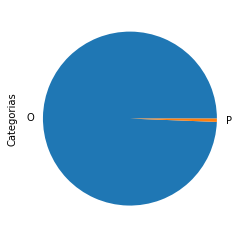

In [55]:
df_teste.Categorias.value_counts(True).plot(kind='pie',legend=False)

___
### Concluindo

A partir da análise dos resultados obtidos, pode-se concluir que o classificador possui um desempenho abaixo do desejável, uma vez que sua acurácia é menor que 66,66%, porcentagem considerada razoável. Um dos motivos para esse resultado, pode ser explicado pela predôminância de palavras com duplo sentido, frases com dupla negação e o uso do sarcasmo, uma vez que o algoritmo utilizado tem como base o uso de probabilidades, sendo esses casos difíceis para a correta classificação. Além disso, visando a realização de uma análise mais profunda e a obtenção de melhores resultados , poderiam ser feitos aperfeiçoamentos. Como por exemplo, uma nova filtragem poderia ser realizada, para retirar os caracteres indesejados remanescentes, além de remover palavras repetidas que foram escritas de maneira diferente com a repetição de letras (como por exemplo "muuuuuuito" ser substituído por "muito"). 

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

___
### Por que não se pode utilizar o próprio classificador para gerar mais amostras de treinamento?

    Ao se utilizar o próprio classificador para gerar mais amostras de treinamento, o classificador acaba ficando 
    'viciado', ou seja, acaba-se por prejudicar os resultados obtidos, e eles acabam não tendo uma qualidade boa.
    Seria o contrário de puxar mais tweets, que melhora a qualidade dos dados e dos resultados, por ter um espaço 
    amostral muito maior.

### Outras limpezas e tranformações:
___
    - Trocar vírguças por espaços
    - Remover URLs

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://www.geeksforgeeks.org/naive-bayes-classifiers/

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/